In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
# import pandas_profiling as ppf
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [2]:
train = pd.read_csv('D:/Competetion/Kaggle/Titanic/train.csv')
test = pd.read_csv('D:/Competetion/Kaggle/Titanic/test.csv')
gender_submission = pd.read_csv('D:/Competetion/Kaggle/Titanic/gender_submission.csv')

数据解释 
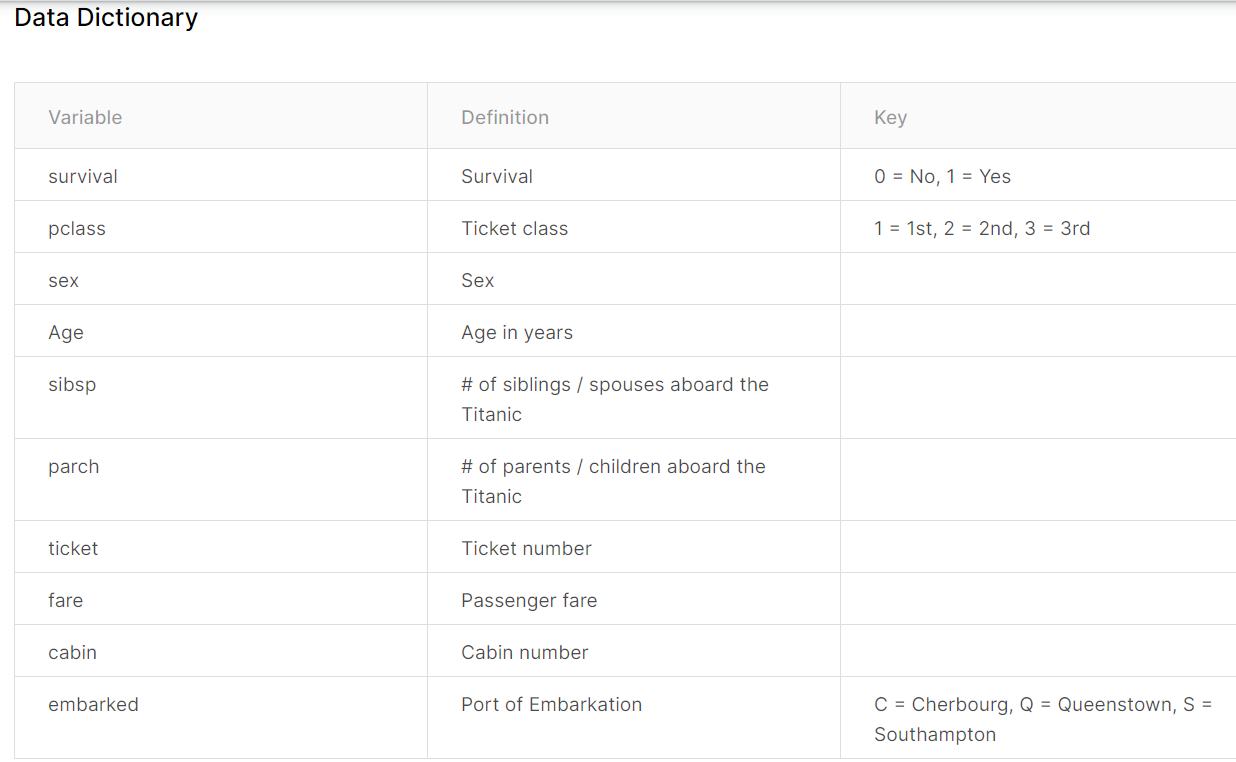

    sibsp表示与乘船者为兄弟 配偶关系.
    parch表示与乘船者为亲子关系
    fare表票价
    cabin表船舱
    embarked表乘船位置

In [3]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
gender_submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [8]:
gender_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


##### 异常处理

In [9]:
# 综上首先填充这个年龄变量
train['Age'] = train['Age'].fillna(np.mean(train['Age']))
test['Age'] = test['Age'].fillna(np.mean(test['Age']))

# 设置inplace参数后,修改保留
train.drop('Cabin', axis = 1, inplace = True)
test.drop('Cabin', axis = 1, inplace = True)

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [11]:
# 改变类别
label = LabelEncoder()
train['Sex'] = label.fit_transform(train['Sex'])
test['Sex'] = label.fit_transform(test['Sex'])

In [12]:
# 归一化处理
scl = MinMaxScaler()
train['Age'] = scl.fit_transform(np.array(train['Age']).reshape(-1, 1)) #为什么要reshape(-1, 1)
test['Age'] = scl.fit_transform(np.array(test['Age']).reshape(-1,1))

In [13]:
train.drop(['Name', 'Embarked'], axis = 1, inplace = True)
test.drop(['Name', 'Embarked'], axis = 1, inplace = True)

# 针对Fare变量进行处理
test['Fare'] = test['Fare'].fillna(np.mean(test['Fare']))

#改变量期望2D array作为输入
train['Fare'] = scl.fit_transform(np.array(train['Fare']).reshape(-1, 1))
test['Fare'] = scl.fit_transform(np.array(test['Fare']).reshape(-1, 1))

train.drop(['Ticket'], axis = 1, inplace = True)
test.drop(['Ticket'], axis = 1, inplace = True)


In [14]:
# 记录乘客id号码
PassengerId = train['PassengerId']

type(test.PassengerId)
type(test['PassengerId']) #两种写法都一样

pandas.core.series.Series

##### 划分数据集

In [22]:
x = train.drop('Survived', axis = 1) #删除Sur列为训练模型做准备

train.info()

y = train['Survived']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int32  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
dtypes: float64(2), int32(1), int64(5)
memory usage: 52.3 KB


In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
x_train.shape, y_train.shape #shape关键字针对pandasSeries对象,其中第二个变量代表关键字数

((623, 7), (623,))

In [28]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 623 entries, 857 to 684
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  623 non-null    int64  
 1   Pclass       623 non-null    int64  
 2   Sex          623 non-null    int32  
 3   Age          623 non-null    float64
 4   SibSp        623 non-null    int64  
 5   Parch        623 non-null    int64  
 6   Fare         623 non-null    float64
dtypes: float64(2), int32(1), int64(4)
memory usage: 36.5 KB


##### 利用sklearn训练模型

In [29]:
linear = LinearRegression()
linear.fit(x_train, y_train)

LinearRegression()

In [35]:
y_pred = linear.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
mae

0.2931077454852207

In [38]:
predict = linear.predict(test)

In [41]:
predict =  pd.DataFrame(predict)